<a href="https://colab.research.google.com/github/gpburdell/WJE_python/blob/main/NOAA_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API Example: Pulling Data from the National Climatic Data Center


# 1. Imports
- requests: Python requests library is a user-friendly HTTP library used for making various types of HTTP requests to URLs via simple methods.
- json: Python json library is a built-in module that allows for encoding and decoding JSON data. JSON, or JavaScript Object Notation, is a lightweight data-interchange format that is easy for humans to read and write, and easy for machines to parse and generate.


In [1]:
# import
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# 2. Accessing the NCDC API
- This step requires an API key. Obtain it from here:
https://www.ncdc.noaa.gov/cdo-web/token

In [2]:
# Set up your API key and base URL
from google.colab import userdata

api_key = userdata.get('noaa')
base_url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'

# Set headers with your API key
headers = {
    'token': api_key
}

## 2.1 Setup the request to the API

In [3]:
# Specify the dataset, location, and data type
endpoint = 'data'
dataset_id = 'GHCND'  # Daily Summaries
# Note you can use either stationid or location id. I found if I wanted Ohare
# the recommendation was station_id.
location_id = 'CITY:US170006'  # Chicago, IL
station_id= 'GHCND:USW00094846'
# NCDC has a number of data types we will also pull precipitation.
data_type_id = 'TAVG'  # Average temperature

start_date = '2023-07-01'
end_date = '2024-05-10'


## 2.2 Access the API through the URL
We will use an f-string, which effectively allows us to update the string with a variable when it is executed.

In [4]:
# Create the request URL
#url = f"{base_url}{endpoint}?datasetid={dataset_id}&locationid={location_id}&datatypeid={data_type_id}&startdate={start_date}&enddate={end_date}&limit=1000"
url = f"{base_url}{endpoint}?datasetid={dataset_id}&stationid={station_id}&datatypeid={data_type_id}&startdate={start_date}&enddate={end_date}&limit=1000"


In [5]:
print(url)

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00094846&datatypeid=TAVG&startdate=2023-07-01&enddate=2024-05-10&limit=1000


## 2.3 Execute the API request

In [6]:
# Make the API request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Load data into a JSON object
    data = json.loads(response.text)
    # Print the data
    #print(json.dumps(data, indent=4))
else:
    print("Failed to retrieve data:", response.status_code)


The text below is the raw output response in JSON form. JSON is a common and lightweight datastructure to transmit data on the web.

In [7]:
response.text

'{"metadata":{"resultset":{"offset":1,"count":315,"limit":1000}},"results":[{"date":"2023-07-01T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":256},{"date":"2023-07-02T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":217},{"date":"2023-07-03T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":232},{"date":"2023-07-04T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":267},{"date":"2023-07-05T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":278},{"date":"2023-07-06T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":233},{"date":"2023-07-07T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":224},{"date":"2023-07-08T00:00:00","datatype":"TAVG","station":"GHCND:USW00094846","attributes":"H,,S,","value":207},{"date":"2023-07-09T00:00:00

# 3. Convert JSON into a pandas dataframe

In [8]:
# convert data into a pandas dataframe
import pandas as pd
df = pd.DataFrame(data['results'])
df

,date,datatype,station,attributes,value
0,2023-07-01T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",256
1,2023-07-02T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",217
2,2023-07-03T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",232
3,2023-07-04T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",267
4,2023-07-05T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",278
...,...,...,...,...,...
310,2024-05-06T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",145
311,2024-05-07T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",185
312,2024-05-08T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",193
313,2024-05-09T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",149


## 3.1 Perform a quick plot of the data
- We note the data seems off by an order of magnitude.

<Axes: >

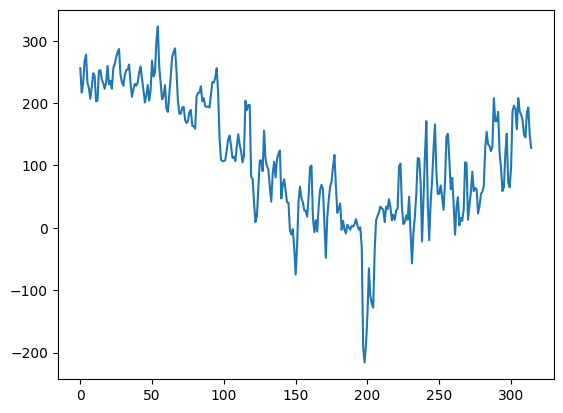

In [9]:
df['value'].plot()

## 3.2 Convert data to deg. F
A little research shows the data is provided in deg. C but with no decimal. Possibly for saving storage and trasmission.

In [10]:
df['temp']= (df['value']/10* 9/5) + 32

In [11]:
df.head()

,date,datatype,station,attributes,value,temp
0,2023-07-01T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",256,78.08
1,2023-07-02T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",217,71.06
2,2023-07-03T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",232,73.76
3,2023-07-04T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",267,80.06
4,2023-07-05T00:00:00,TAVG,GHCND:USW00094846,"H,,S,",278,82.04


<Axes: >

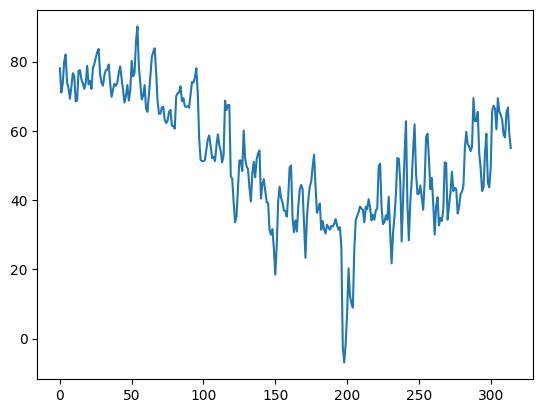

In [12]:
df['temp'].plot()

## 3.3 Update index and pull a subset into a dataframe
We are only interested in the temperature data

In [13]:
df.set_index('date', inplace=True)

Make a new dataframe chicago and just pull in 'temp'. Note the index is the date and we do not need to specifically request it.

In [14]:
chicago= df[['temp']]

In [15]:
chicago

,temp
date,
2023-07-01T00:00:00,78.08
2023-07-02T00:00:00,71.06
2023-07-03T00:00:00,73.76
2023-07-04T00:00:00,80.06
2023-07-05T00:00:00,82.04
...,...
2024-05-06T00:00:00,58.10
2024-05-07T00:00:00,65.30
2024-05-08T00:00:00,66.74


Another quick plot and we can see our x-axis is date aware. A bit messy, but we can get back to that.

<Axes: xlabel='date'>

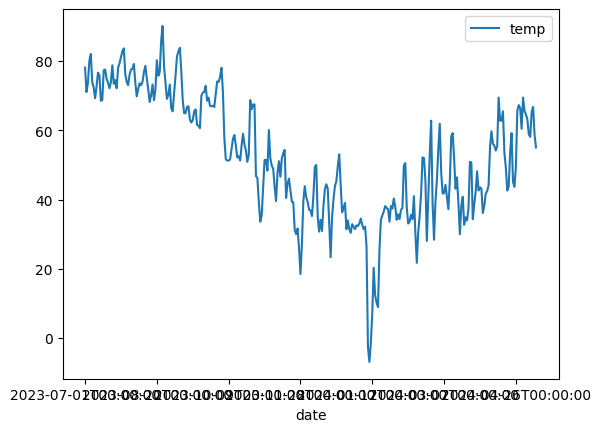

In [16]:
chicago.plot()

# 4. Visualization

## 4.1 Plotly Interactive Plotting Library

In [45]:
import plotly.express as px

# Plotly has several methods of plotting. For one dataframe express makes life easy.
# One trick in access the x-axis data if we want the index, we need to use a special call
fig = px.line(chicago, x=chicago.index, y='temp')

# Plotly has lots of options and features
fig.update_layout(
    title='Chicago Temperatures from NCDC',
    xaxis_title="Datetime",
    yaxis_title="Temperature (Deg. F)",
    # I want a longer aspect plot
    width=576,  # 6 inches in pixels (assuming 96px/in)
    height=288   # 3 inches in pixels
)
fig.show()

In [40]:
# Min temperature
chicago['temp'].min()

-6.880000000000003

In [41]:
chicago['temp'].idxmin()

'2024-01-15T00:00:00'

In [46]:
# Add a marker for the specific cold day
coldest_day = chicago['temp'].idxmin()
fig.add_scatter(
    x=[coldest_day], y=[chicago.loc[coldest_day, 'temp']],
    mode='markers', marker=dict(color='blue', size=10),
    showlegend=False
)

# Add an annotation at the coldest day
fig.add_annotation(
    x=coldest_day, y=chicago.loc[coldest_day, 'temp'],
    text="Coldest day at -6.88°F",
    showarrow=True,
    arrowhead=1,
    ax=0,  # arrow x offset
    ay=10  # arrow y offset (negative to point down)
)

fig.show()

In [48]:


# Add a vertical rectangle to highlight the conference dates
fig.add_vrect(
    x0="2024-04-28", x1="2024-05-04",
    fillcolor="red", opacity=0.5,
    layer="below", line_width=0,
    annotation_text="WJE Conference!",  # text to display
    annotation_position="top right"
)

fig.show()


In [44]:
fig.write_html('temp.html')

## Time permitting - Precipitation

Overwritting variables is not recommended, but fine for what we are doing. Better would be to write a function (another day!)

In [84]:
data_type_id = 'PRCP'  # Average temperatureRCP

In [85]:
# Create the request URL
#url2 = f"{base_url}{endpoint}?datasetid={dataset_id}&locationid={location_id}&datatypeid={data_type_id}&startdate={start_date}&enddate={end_date}&limit=1000"
url2 = f"{base_url}{endpoint}?datasetid={dataset_id}&stationid={station_id}&datatypeid={data_type_id}&startdate={start_date}&enddate={end_date}&limit=1000"


In [86]:
# Make the API request
response = requests.get(url2, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Load data into a JSON object
    data = json.loads(response.text)
    # Print the data
    #print(json.dumps(data, indent=4))
else:
    print("Failed to retrieve data:", response.status_code)


In [87]:
# convert data into a pandas dataframe
df = pd.DataFrame(data['results'])
df

,date,datatype,station,attributes,value
0,2023-07-01T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",119
1,2023-07-02T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",851
2,2023-07-03T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",0
3,2023-07-04T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",0
4,2023-07-05T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",117
...,...,...,...,...,...
310,2024-05-06T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",0
311,2024-05-07T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",198
312,2024-05-08T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",0
313,2024-05-09T00:00:00,PRCP,GHCND:USW00094846,",,W,2400",130


Taking some effort to do some research after reviewing this data

In [88]:
df['value']

0      119
1      851
2        0
3        0
4      117
      ... 
310      0
311    198
312      0
313    130
314     28
Name: value, Length: 315, dtype: int64

In [89]:
df.set_index('date', inplace=True)

In [90]:
chicago_prcp= df[['value']]

<Axes: xlabel='date'>

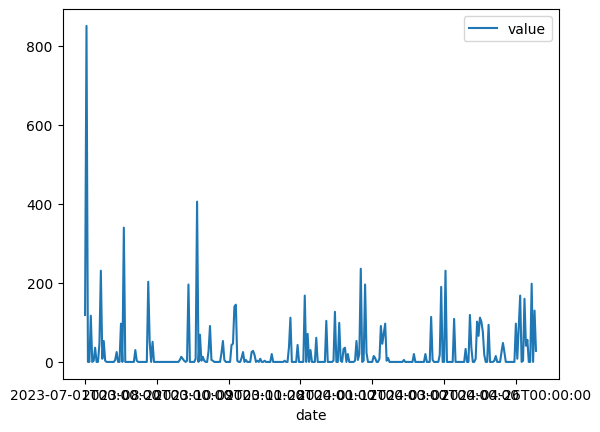

In [91]:
chicago_prcp.plot()

So after some research it looks like mm.

In [92]:
# convert chicago_prcp['value'] from mm's to inches and store in chicago['prcp']
chicago_prcp['prcp'] = chicago_prcp['value'] / 254

<ipython-input-92-77149cbd5b12>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I pulled another source and this looks about right

<Axes: xlabel='date'>

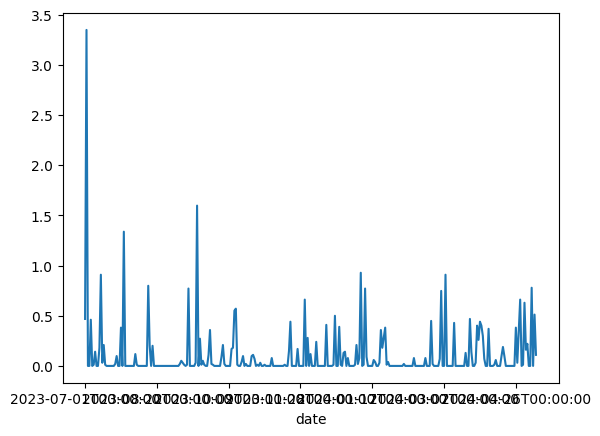

In [93]:
chicago_prcp['prcp'].plot()

In [94]:
chicago_prcp['prcp'].max()

3.3503937007874014

In [95]:
chicago['prcp'] = chicago_prcp['prcp']

<ipython-input-95-c025707fe69a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
chicago['prcp']

date
2023-07-01T00:00:00    0.468504
2023-07-02T00:00:00    3.350394
2023-07-03T00:00:00    0.000000
2023-07-04T00:00:00    0.000000
2023-07-05T00:00:00    0.460630
                         ...   
2024-05-06T00:00:00    0.000000
2024-05-07T00:00:00    0.779528
2024-05-08T00:00:00    0.000000
2024-05-09T00:00:00    0.511811
2024-05-10T00:00:00    0.110236
Name: prcp, Length: 315, dtype: float64

<Axes: xlabel='date'>

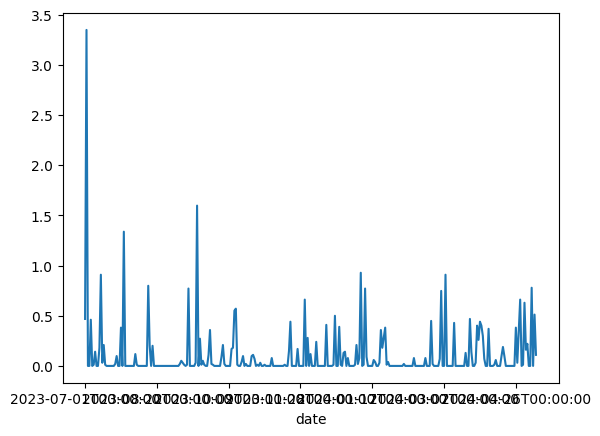

In [97]:
chicago['prcp'].plot()

## Putting it all together

In [108]:
import plotly.graph_objects as go

# Assuming 'chicago' DataFrame contains both 'temp' (temperature) and 'prcp' (precipitation) columns
# Create figure with secondary y-axis
fig = go.Figure()

# Add temperature trace
fig.add_trace(
    go.Scatter(x=chicago.index, y=chicago['temp'], name='Temperature', mode='lines'),
)

# Add precipitation trace with a secondary y-axis
fig.add_trace(
    go.Scatter(x=chicago.index, y=chicago['prcp'], name='Precipitation', mode='lines', yaxis='y2'),
)

# Update layout with title, width, height, and x-axis title
fig.update_layout(
    title='Chicago Temperatures and Precipitation from NCDC',
    xaxis_title='Datetime',
    yaxis_title='Temperature (Deg. F)',
    width=700,  # 6 inches in pixels
    height=288,  # 3 inches in pixels
    yaxis=dict(
        title='Temperature (Deg. F)'
    ),
    yaxis2=dict(
        title='Precipitation (inches)',
        overlaying='y',
        side='right'
    )
)

# Add a vertical rectangle for the event
fig.add_vrect(
    x0="2024-04-28", x1="2024-05-04",
    fillcolor="green", opacity=0.3,
    layer="below", line_width=0,
    annotation_text="WJE Conference!",
    annotation_position="top right"
)

# Add a marker for the specific cold day
coldest_day = chicago['temp'].idxmin()
fig.add_scatter(
    x=[coldest_day], y=[chicago.loc[coldest_day, 'temp']],
    mode='markers', marker=dict(color='blue', size=10),
    showlegend=False
)

# Add an annotation at the coldest day
fig.add_annotation(
    x=coldest_day, y=chicago.loc[coldest_day, 'temp'],
    text="Coldest day at -6.88°F",
    showarrow=True,
    arrowhead=1,
    ax=-70,  # arrow x offset
    ay=-20 # arrow y offset (negative to point down)
)

fig.show()


In [33]:
import requests

api_key = 'YOUR_API_KEY'
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
params = {
    'datasetid': 'GHCND',
    'stationid': 'GHCND:USW00094846',  # Station ID for Chicago O'Hare
    'datatypeid': 'PRCP',  # Precipitation
    'startdate': '2023-07-01',
    'enddate': '2023-07-01',
    'limit': 1000
}

headers = {
    'token': api_key
}

response = requests.get(base_url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Failed to retrieve data:", response.status_code, response.text)


Failed to retrieve data: 400 {"status" : "400", "message" : "The token parameter provided is not valid."}
